In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [40]:
videoCapture = cv2.VideoCapture(0)
_,frame_to_be_tracked = videoCapture.read()

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_rect = face_cascade.detectMultiScale(frame_to_be_tracked)
videoCapture.release()

In [41]:
face_rect[0]

array([221, 164, 223, 223], dtype=int32)

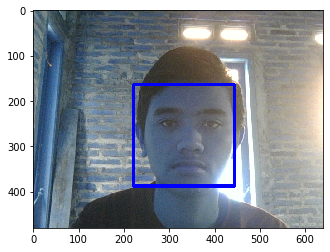

In [42]:
plt.imshow(cv2.rectangle(frame_to_be_tracked,(face_rect[0][0],face_rect[0][1]),(face_rect[0][0]+face_rect[0][2],face_rect[0][1]+face_rect[0][3]),(0,0,255),5))

In [43]:
(face_x,face_y,w,h) = tuple(face_rect[0])
track_window = (face_x,face_y,w,h)

In [44]:
roi = frame_to_be_tracked[face_y:face_y+h,face_x:face_x+w]
roi_hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([roi_hsv],[0],None,[180],[0,180])

In [45]:
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,1)

In [46]:
videoCapture = cv2.VideoCapture(0)
while True:
    res,frame = videoCapture.read()
    if res:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        ret, track_window = cv2.meanShift(dst,track_window,term_criteria)
        x,y,w,h = track_window
        
        image2 = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),5)
        cv2.imshow('Camera',image2)
        cv2.imshow('Face to be tracked',cv2.rectangle(frame_to_be_tracked,(face_rect[0][0],face_rect[0][1]),(face_rect[0][0]+face_rect[0][2],face_rect[0][1]+face_rect[0][3]),(0,0,255),5))
        
        if cv2.waitKey(1) == 27:
            break
    else:
        break
        
videoCapture.release()
cv2.destroyAllWindows()